In [2]:
import pandas as pd
import os

##Merge data into one file

In [3]:
data=pd.read_csv('./Sales_Data/Sales_April_2019.csv')

In [6]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
from os import listdir
from os.path import isfile, join
files=[file for file in listdir('./Sales_Data/')]

all_months_data=pd.DataFrame()
for file in files:
    data=pd.read_csv('./Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data,data])
all_months_data.to_csv('all_data.csv',index=False)
    

In [5]:
all_data=pd.read_csv('all_data.csv')

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##q1) What a was the best month for sale?How much money was eanbed that month?

In [7]:
#removing Or data
all_data=all_data[all_data["Order Date"].str[0:2] != 'Or']

In [8]:
#convert columns to current type
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])

In [9]:
#data cleaning
all_data=all_data.dropna()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
#creating column month
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
#ADD a sales column
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [12]:
#ans1)
results=all_data.groupby("Month").sum()["Sales"]
results

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [13]:
import matplotlib.pyplot as plt

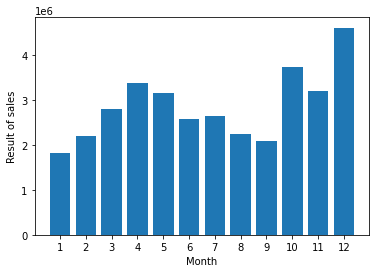

In [16]:
months=range(1,13)
plt.bar(months,results)
plt.xticks(months)
plt.ylabel("Result of sales")
plt.xlabel("Month")
plt.show()

##what city has hghest number of sales?

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [21]:
high_sales=all_data.groupby('Purchase Address').count()["Sales"]
high_sales

Purchase Address
1 11th St, Atlanta, GA 30301              1
1 11th St, Los Angeles, CA 90001          1
1 11th St, San Francisco, CA 94016        1
1 12th St, Los Angeles, CA 90001          1
1 12th St, New York City, NY 10001        1
                                         ..
999 Wilson St, Atlanta, GA 30301          1
999 Wilson St, Los Angeles, CA 90001      1
999 Wilson St, New York City, NY 10001    1
999 Wilson St, Portland, OR 97035         1
999 Wilson St, San Francisco, CA 94016    1
Name: Sales, Length: 140787, dtype: int64

In [22]:
#ans
high_sales.idxmax()

'193 Forest St, San Francisco, CA 94016'

In [23]:
##alternate for what i did


In [33]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data["City"]=all_data["Purchase Address"].apply(lambda x:x.split(',')[1]+''+ get_state(x))
all_data['City']

0                 DallasTX
2                 BostonMA
3            Los AngelesCA
4            Los AngelesCA
5            Los AngelesCA
                ...       
186845       Los AngelesCA
186846     San FranciscoCA
186847     San FranciscoCA
186848     San FranciscoCA
186849     San FranciscoCA
Name: City, Length: 185950, dtype: object

In [34]:
#ans
high_sales_city=all_data.groupby("City").count()['Sales'].idxmax()
high_sales_city

' San FranciscoCA'

#q3) What time should we display advertisments to maximise likelihood of customers buying products?

In [39]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,DallasTX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,BostonMA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los AngelesCA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los AngelesCA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los AngelesCA


In [40]:
all_data['Order Date']=pd.to_datetime(all_data["Order Date"])

In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,DallasTX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,BostonMA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los AngelesCA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los AngelesCA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los AngelesCA


In [48]:
all_data['Hour']=all_data["Order Date"].dt.hour
all_data['Minute']=all_data["Order Date"].dt.minute

In [49]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,DallasTX,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,BostonMA,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los AngelesCA,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los AngelesCA,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los AngelesCA,9,27


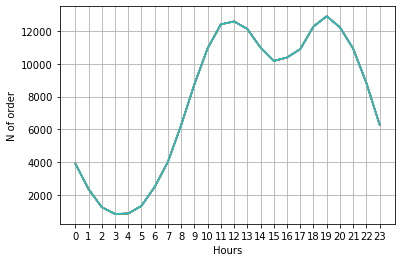

In [55]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("N of order")
plt.grid()
plt.show()

In [56]:
##q4)What products are often sold together?

In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,DallasTX,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,BostonMA,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los AngelesCA,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los AngelesCA,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los AngelesCA,9,27


In [64]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

<ipython-input-64-71c2c42dbb86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [65]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df["Grouped"]:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [66]:
##q5) what product sold the most?Why do you think it sold the most ?

In [67]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,DallasTX,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,BostonMA,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los AngelesCA,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los AngelesCA,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los AngelesCA,9,27


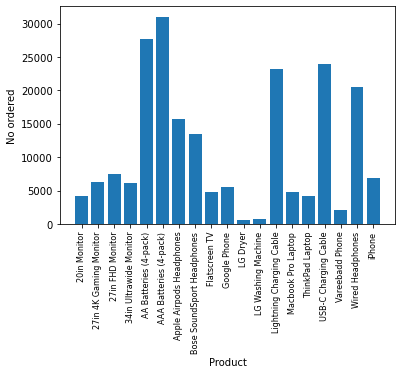

In [72]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()["Quantity Ordered"]

products=[product for product,df in product_group]
plt.ylabel("No ordered")
plt.xlabel("Product")
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation="vertical",size=8)
plt.show()

<ipython-input-77-7e01abd9d30a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
<ipython-input-77-7e01abd9d30a>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


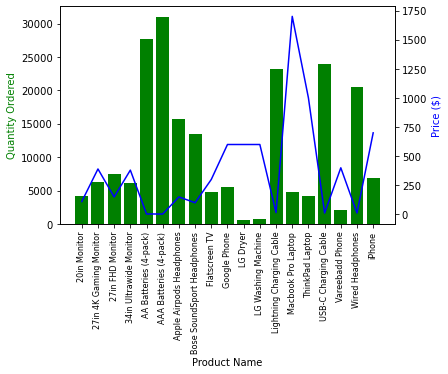

In [77]:
prices=all_data.groupby("Product").mean()["Price Each"]
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

NameError: name 'keys' is not defined

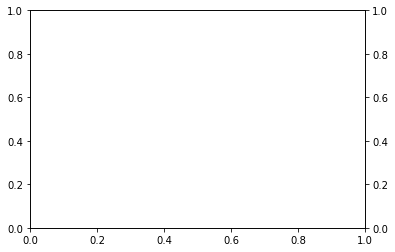